In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# import graph_tools

[0 0 0 1 0 1 0 0 0 1]


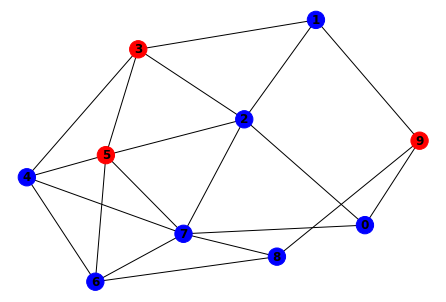

In [2]:
network_size  = 10
# Network selection
G = nx.watts_strogatz_graph(n=network_size, k=4, p=0.3) # p=1 -> all-to-all connectivity

# Opinion initial conditions
def randonly_seeded_opinion(number_opiniated, network_size):
    opiniated = np.ones((number_opiniated,), dtype=int)
    neutral = np.zeros((network_size - number_opiniated,), dtype=int)
    return np.random.permutation(np.concatenate((opiniated, neutral), axis=0))

number_opiniated = 3
opinion = randonly_seeded_opinion(number_opiniated, network_size)


def colors(o):
    result = []
    for item in o:
        if item == 1:
            result.append('red')
        else:
            result.append('blue')
    return result

nx.draw(G, node_color = colors(opinion), with_labels=True, font_weight='bold')
plt.show()

In [3]:
A = nx.adjacency_matrix(G)

In [4]:
def step(A, o, threshold):
    # above threshold_min opinion formation
    alive_neighbours = A.dot(o)
    new_opinion = 1*(alive_neighbours >= threshold)
    opinion = np.maximum(o, new_opinion)
    
    # above threshold_max opinion formation
    return opinion

threshold = 2

[0 1 1 1 1 1 0 0 0 1]


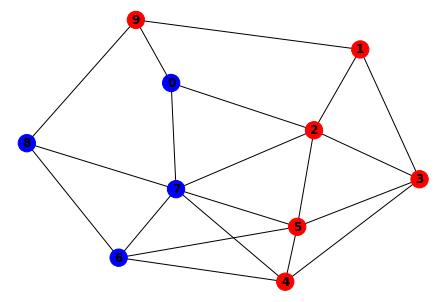

[1 1 1 1 1 1 1 1 0 1]


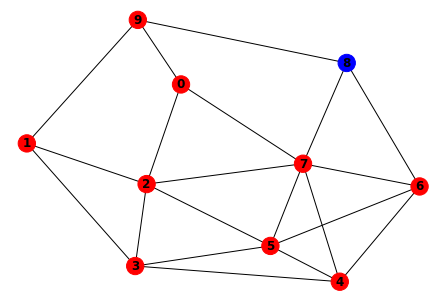

[1 1 1 1 1 1 1 1 1 1]


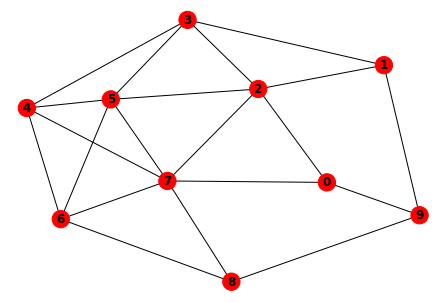

In [5]:
number_steps = 3

def iteration(A, v, threshold, number_steps):
    for i in range(0,number_steps):
        v_new = step(A, v,threshold)
        v = v_new
        print(v_new)
        nx.draw(G, node_color = colors(v_new), with_labels=True, font_weight='bold')
        plt.show()
        
iteration(A, opinion, threshold, number_steps)  

In [6]:
print(opinion)

[0 0 0 1 0 1 0 0 0 1]
